# Explanation of the larger context around this notebook

See the [slides](https://github.com/Josh-Joseph/tsc-2019/blob/master/docs/TSC-2019_slides.pdf) from [TSC 2019](https://www.tsc2019-interlaken.ch/)

# Notebook setup

In [1]:
# import the used packages/modules and call the needed jupyter notebook line magics 

import sys
sys.path.append('..')
import time
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

from tsc import world
from tsc.simple_agents import DoNothingAgent, RandomAgent
from tsc.dqn_agent_with_internal_states import brain_state_to_internal_state
from tsc.training import load_pretrained_agent
from tsc.visualization_utils import visualize_weights, visualize_activations

%matplotlib inline

# The environment and the agent's "physical" form

## Intuition for the environment

[OpenAI's LunarLander-v2](https://gym.openai.com/envs/LunarLander-v2/)
- The agent is a lunar lander attempting to softly land between the flags
- Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points
- Each leg ground contact is +10
- Firing the engines is a small negative reward
- Small positive reward for smoother flight
- Fuel is infinite
- Four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine

In [2]:
%%HTML
<video width="480" height="360" controls>
  <source src="../resources/videos/openai_lunarlander_video.mp4" type="video/mp4">
</video>

## Intuition for agents in the environment

In [3]:
# An agent that does nothing
    
agent = DoNothingAgent()
episode_history = world.run_episode(agent, seed=2)
print("The agent recieved {} total reward".format(int(round(sum(episode_history['reward'])))))

The agent recieved -136 total reward


In [4]:
# An agent that takes random actions

agent = RandomAgent()
episode_history = world.run_episode(agent, seed=2)
print("The agent recieved {} total reward".format(int(round(sum(episode_history['reward'])))))

The agent recieved -83 total reward


# Our agent

The structure of the agent:
![The structure of the agent](../resources/images/agent_structure.png)

## Training the agent

In [5]:
agent = load_pretrained_agent()

The performance of the agent during training:
![The training performance of the agent](../resources/images/training_performance.png)

## The agent acting in the environment

In [6]:
episode_history = world.run_episode(agent, seed=2)
print("The agent recieved {} total reward".format(int(round(sum(episode_history['reward'])))))

The agent recieved 266 total reward


# Brain state and internal state instances of the agent

Internal state: 
{'i_am_to_the_left_of_the_center', 'i_am_low_to_the_ground'}


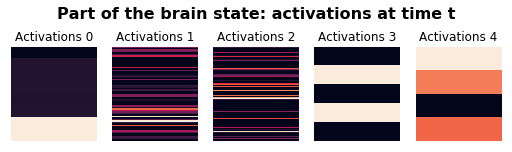

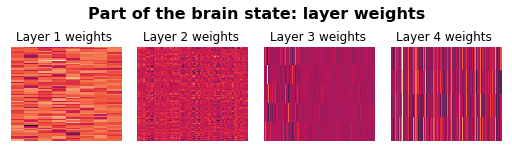

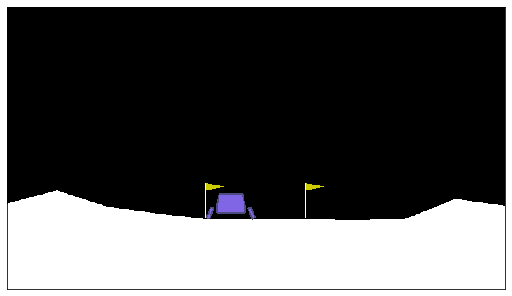

In [7]:
def visualize_brain_state_and_internal_state_instance(episode_index):

    brain_state = agent.get_brain_state(episode_history['observation'][episode_index])
    
    internal_state = brain_state_to_internal_state(brain_state)
    
    visualize_activations(brain_state)
    visualize_weights(brain_state)
    world.visualize(episode_history['world_image'][episode_index])
    
    print("Internal state: \n{}".format(internal_state))

for episode_i in range(0, len(episode_history['observation']), 25):
    clear_output(wait=True)
    visualize_brain_state_and_internal_state_instance(episode_i)
    plt.show()
    time.sleep(3)